In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [3]:
# import functions from modsim and import random
import random
from modsim import *

## TASK NO 2

In [4]:
tc_list=random.sample(range(1,24), 8)                                           # list of time between contacts in days 
tr_list=random.sample(range(1,24), 8)                                           # list of recovery time in days


beta_list = [1 / tc for tc in tc_list]                                          # list of contact rate in per day
gamma_list = [1 / tr for tr in tr_list]                                         # list of recovery rate in per day





In [5]:
init = State(s=89, i=1, r=0)                                                    # initial state with one infected student in a class of 90

init /= init.sum()                                                              # converting the numbers to fractions by dividing by the total


In [6]:
def make_system(beta, gamma):                                                   # The following function takes the system parameters and returns a new System objec
    init = State(s=89, i=1, r=0)                                                # initial state with one infected student in a class of 90
    init /= init.sum()                                                          # converting the numbers to fractions by dividing by the total

    return System(init=init, t_end=7*14,
                  beta=beta, gamma=gamma)
    

def update_func(t, state, system):                                              # update function we’ll use for the KM model
    s, i, r = state.s, state.i, state.r

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(s=s, i=i, r=r)


def run_simulation(system, update_func):                                        # a concise version of run_simulation using a TimeFrame
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init
    
    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)
    
    return frame


results_list=[]                                                                 # keeping the results of 8 different pairs of values in a list

for i in range(0,8):                                                            # using 8 pairs of randomly generated gamma and beta values to simulate the output
  beta=beta_list[i]
  gamma=gamma_list[i]

  system = make_system(beta, gamma)

  state = update_func(0, init, system)
  results = run_simulation(system, update_func)
  results_list.append(results)

In [7]:
import matplotlib.pyplot as plt

def plot_results(S, I, R):
    S.plot(style='--', label='Susceptible')
    I.plot(style='-', label='Infected')
    R.plot(style=':', label='Resistant')
    max_i=max(I)                                                                # finding maximum value
    index=results[I==max_i].index.values                                        # maximum value's index
    plt.plot(index,max_i,'bo', label='Maximum Infection Moment')
    plt.title('SIR model')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')
    
# Plotting 8 different graphs below

Beta: 0.07692307692307693, Gamma: 0.07142857142857142


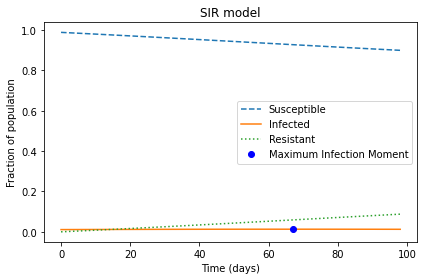

In [8]:
print('Beta: {}, Gamma: {}'.format(beta_list[0],gamma_list[0]))
plot_results(results_list[0].s, results_list[0].i, results_list[0].r)

Beta: 0.045454545454545456, Gamma: 0.045454545454545456


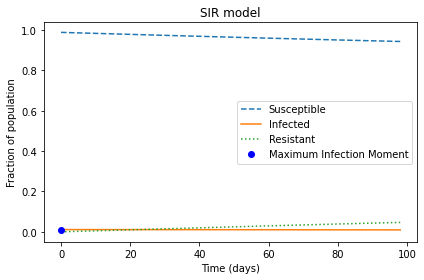

In [9]:
print('Beta: {}, Gamma: {}'.format(beta_list[1],gamma_list[1]))
plot_results(results_list[1].s, results_list[1].i, results_list[1].r)

Beta: 0.1111111111111111, Gamma: 0.16666666666666666


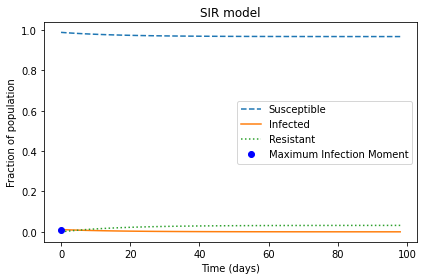

In [10]:
print('Beta: {}, Gamma: {}'.format(beta_list[2],gamma_list[2]))
plot_results(results_list[2].s, results_list[2].i, results_list[2].r)

Beta: 0.3333333333333333, Gamma: 0.09090909090909091


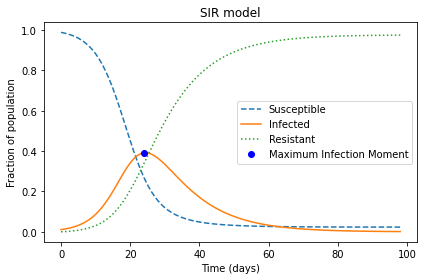

In [11]:
print('Beta: {}, Gamma: {}'.format(beta_list[3],gamma_list[3]))
plot_results(results_list[3].s, results_list[3].i, results_list[3].r)

Beta: 0.14285714285714285, Gamma: 0.043478260869565216


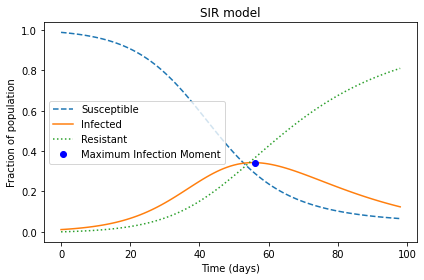

In [12]:
print('Beta: {}, Gamma: {}'.format(beta_list[4],gamma_list[4]))
plot_results(results_list[4].s, results_list[4].i, results_list[4].r)

Beta: 0.05555555555555555, Gamma: 0.14285714285714285


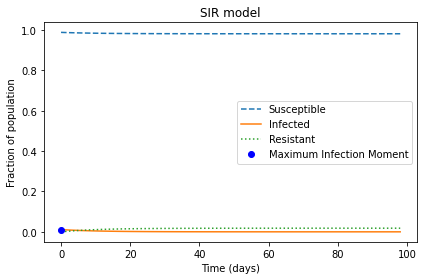

In [13]:
print('Beta: {}, Gamma: {}'.format(beta_list[5],gamma_list[5]))
plot_results(results_list[5].s, results_list[5].i, results_list[5].r)

Beta: 0.2, Gamma: 0.07692307692307693


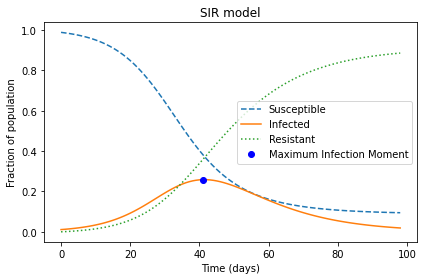

In [14]:
print('Beta: {}, Gamma: {}'.format(beta_list[6],gamma_list[6]))
plot_results(results_list[6].s, results_list[6].i, results_list[6].r)

Beta: 0.047619047619047616, Gamma: 0.1


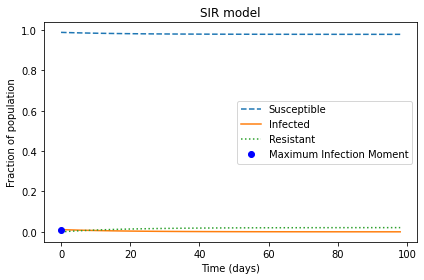

In [15]:
print('Beta: {}, Gamma: {}'.format(beta_list[7],gamma_list[7]))
plot_results(results_list[7].s, results_list[7].i, results_list[7].r)

## TASK NO 4

In [16]:
def calc_total_infected(results, system):                                       # total number of infections by computing the difference in s at the beginning and the end of the simulation
    s_0 = results.s[0]
    s_end = results.s[system.t_end]
    return s_0 - s_end


In [17]:
# Just changing the beta and gamma array (equal arrays)

beta_array = [0.2, 0.4, 0.6, 0.8, 1.0]
gamma_array = [0.2, 0.4, 0.6, 0.8, 1.0]
gamma = 0.25


def sweep_beta(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = calc_total_infected(results, system)
    return sweep


def sweep_parameters(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta(beta_array, gamma)
    return frame

frame = sweep_parameters(beta_array, gamma_array)



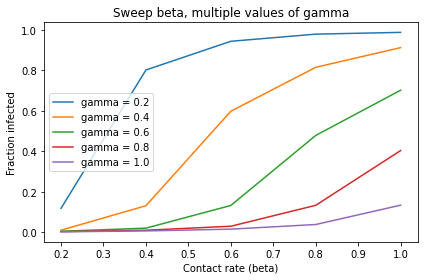

In [18]:
for gamma in gamma_array:
    label = f'gamma = {gamma}'
    frame[gamma].plot(label=label)

decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected',
         title='Sweep beta, multiple values of gamma')


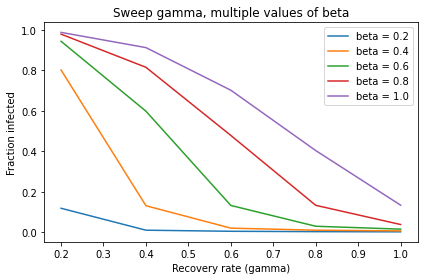

In [19]:

for beta in beta_array:
    label = f'beta = {beta}'
    frame.loc[beta].plot(label=label)
    
decorate(xlabel='Recovery rate (gamma)',
         ylabel='Fraction infected',
         title='Sweep gamma, multiple values of beta')

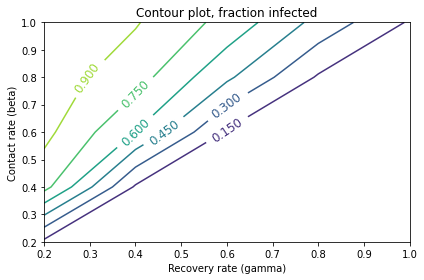

In [20]:
contour(frame)

decorate(xlabel='Recovery rate (gamma)',
         ylabel='Contact rate (beta)',
         title='Contour plot, fraction infected')

## TASK NO 5

In [21]:
tc = 2                                                                          # time between contacts in days 
tr = 5                                                                          # recovery time in days
tv = 3                                                                          # vaccinations


beta = 1 / tc                                                                   # contact rate in per day
gamma = 1 / tr                                                                  # recovery rate in per day
alpha = 1 / tv                                                                  # vaccination rate in per day

init = State(s=89, i=1, r=0, v=0)                                               # initial state with one infected student in a class of 90

init /= init.sum()                                                              # converting the numbers to fractions by dividing by the total



# New functions for SIR-V model (update_func2 is modified)

def make_system2(beta, gamma, alpha):
    init = State(s=89, i=1, r=0, v=0)
    init /= init.sum()

    return System(init=init, t_end=7*14,
                  beta=beta, gamma=gamma, alpha=alpha)
    

def update_func2(t, state, system):
    s, i, r, v = state.s, state.i, state.r, state.v

    infected = system.beta * i * s    
    recovered = system.gamma * i
    vaccinated = system.alpha * s**2                                            # mentioned in the question 5
    
    s += - infected - vaccinated
    i += infected - recovered
    r += recovered
    v += vaccinated                                                             # mentioned in the question 5
    return State(s=s, i=i, r=r, v=v)


def run_simulation2(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init
    
    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)
    
    return frame

# simulating outputs for SIR & SIR-V models to compare

system = make_system(beta, gamma)
state = update_func(0, init, system)
results= run_simulation(system, update_func)

system2 = make_system2(beta, gamma,alpha)
state2 = update_func2(0, init, system2)
results2 = run_simulation2(system2, update_func2)


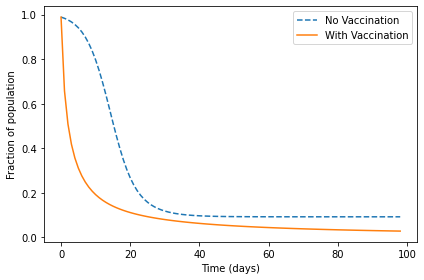

In [22]:
results.s.plot(style='--', label='No Vaccination')
results2.s.plot(label='With Vaccination')

decorate(xlabel='Time (days)',
         ylabel='Fraction of population')

Vaccination has a strong impact on the population

In [23]:
def plot_results2(S, I, R,V):
    S.plot(style='--', label='Susceptible')
    I.plot(style='-', label='Infected')
    R.plot(style=':', label='Resistant')
    V.plot(style=':', label='Vaccination')

    max_i=max(I)
    index=results[I==max_i].index.values
    plt.plot(index,max_i,'bo', label='Maximum Infection Moment')
    plt.title('SIR-V model')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

Beta: 0.5, Gamma: 0.2


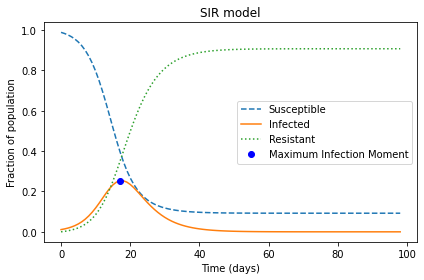

In [24]:
print('Beta: {}, Gamma: {}'.format(beta,gamma))
plot_results(results.s, results.i, results.r)

Without vaccination the infection peak is quite higher and the Susceptible population decreases slower 

Beta: 0.5, Gamma: 0.2, Alpha: 0.3333333333333333


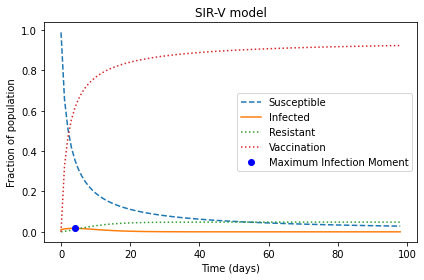

In [25]:
print('Beta: {}, Gamma: {}, Alpha: {}'.format(beta,gamma,alpha))
plot_results2(results2.s, results2.i, results2.r,results2.v)

With vaccination the peak infection moment is much lower also the infection rate is very low. The Susceptible population decreases faster 